# The dataset contains all the information needed to summarize the story of IPL 2022 so far.

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
ipl_data=pd.read_csv('/content/drive/MyDrive/projectData/Book_ipl22_ver_31.csv')

In [116]:
ipl_data.head(10)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
5,6,"March 30,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Kolkata,Group,Banglore,Field,128,10,132,7,Banglore,Wickets,3,Wanindu Hasaranga,Sherfane Rutherford,28,Wanindu Hasaranga,4--20
6,7,"March 31,2022","Brabourne Stadium, Mumbai",Chennai,Lucknow,Group,Lucknow,Field,210,7,211,4,Lucknow,Wickets,6,Evin Lewis,Quinton de Kock,61,Ravi Bishnoi,2--24
7,8,"April 1,2022","Wankhede Stadium, Mumbai",Kolkata,Punjab,Group,Kolkata,Field,137,10,141,4,Kolkata,Wickets,6,Umesh Yadav,Andre Russell,70,Umesh Yadav,4--23
8,9,"April 2,2022","Dr DY Patil Sports Academy, Mumbai",Mumbai,Rajasthan,Group,Mumbai,Field,193,8,170,8,Rajasthan,Runs,23,Jos Buttler,Jos Buttler,100,Jasprit Bumrah,3--17
9,10,"April 2,2022","Maharashtra Cricket Association Stadium,Pune",Delhi,Gujarat,Group,Delhi,Field,171,6,157,9,Gujarat,Runs,14,Lockie Ferguson,Shubman Gill,84,Lockie Ferguson,4--28


In [117]:
ipl_data.dtypes

match_id                int64
date                   object
venue                  object
team1                  object
team2                  object
stage                  object
toss_winner            object
toss_decision          object
first_ings_score        int64
first_ings_wkts         int64
second_ings_score       int64
second_ings_wkts        int64
match_winner           object
won_by                 object
margin                  int64
player_of_the_match    object
top_scorer             object
highscore               int64
best_bowling           object
best_bowling_figure    object
dtype: object

# let’s start by looking at the number of matches won by each team in IPL 2022:

In [118]:
ipl_data['match_winner']

0       Kolkata
1         Delhi
2        Punjab
3       Gujarat
4     Rajasthan
        ...    
66     Banglore
67    Rajasthan
68       Mumbai
69       Punjab
70      Gujarat
Name: match_winner, Length: 71, dtype: object

In [119]:
counti=ipl_data['match_winner'].value_counts()

In [120]:
print(counti)

Gujarat      11
Rajasthan     9
Lucknow       9
Banglore      8
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: match_winner, dtype: int64


In [121]:
from collections import Counter
teams = ipl_data['match_winner']
counter = {}
for winner in teams:
  if winner not in counter:
    counter[winner] = 0
  counter[winner] += 1
counter

{'Banglore': 8,
 'Chennai': 4,
 'Delhi': 7,
 'Gujarat': 11,
 'Hyderabad': 6,
 'Kolkata': 6,
 'Lucknow': 9,
 'Mumbai': 4,
 'Punjab': 7,
 'Rajasthan': 9}

In [122]:
y=list(counter.values())
x=list(counter.keys())

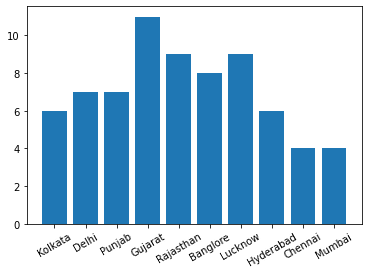

In [123]:
import matplotlib.pyplot as plt
plt.bar(x,y)
plt.xticks(rotation=30)
plt.show()

So, currently, Gujrat is leading the tournament by winning eight matches. It is an achievement as a new team for Gujrat in IPL.

# Method 2
Using value_counts()

In [124]:
match_winner=ipl_data['match_winner'].value_counts()
match_winner

Gujarat      11
Rajasthan     9
Lucknow       9
Banglore      8
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: match_winner, dtype: int64

In [125]:
label = match_winner.index
counts = match_winner.values

In [126]:
label

Index(['Gujarat', 'Rajasthan', 'Lucknow', 'Banglore', 'Delhi', 'Punjab',
       'Kolkata', 'Hyderabad', 'Chennai', 'Mumbai'],
      dtype='object')

In [127]:
counts

array([11,  9,  9,  8,  7,  7,  6,  6,  4,  4])

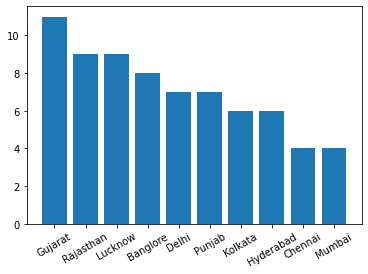

In [128]:
import matplotlib.pyplot as plt
plt.bar(label,counts)
plt.xticks(rotation=30)
plt.show()

# Now let’s see how most of the teams win. Here we will analyze whether most of the teams win by defending (batting first) or chasing (batting second):

In [129]:
how_win=ipl_data['won_by']
how_win

0     Wickets
1     Wickets
2     Wickets
3     Wickets
4        Runs
       ...   
66    Wickets
67    Wickets
68    Wickets
69    Wickets
70    Wickets
Name: won_by, Length: 71, dtype: object

In [130]:
chas=how_win.loc[how_win=='Wickets']
chas

0     Wickets
1     Wickets
2     Wickets
3     Wickets
5     Wickets
6     Wickets
7     Wickets
12    Wickets
13    Wickets
14    Wickets
15    Wickets
16    Wickets
17    Wickets
20    Wickets
24    Wickets
27    Wickets
28    Wickets
31    Wickets
32    Wickets
35    Wickets
39    Wickets
40    Wickets
42    Wickets
43    Wickets
46    Wickets
47    Wickets
51    Wickets
57    Wickets
58    Wickets
61    Wickets
66    Wickets
67    Wickets
68    Wickets
69    Wickets
70    Wickets
Name: won_by, dtype: object

In [131]:
defend=how_win.loc[how_win=='Runs']
defend

4     Runs
8     Runs
9     Runs
10    Runs
11    Runs
18    Runs
19    Runs
21    Runs
22    Runs
23    Runs
25    Runs
26    Runs
29    Runs
30    Runs
33    Runs
34    Runs
36    Runs
37    Runs
38    Runs
41    Runs
44    Runs
45    Runs
48    Runs
49    Runs
50    Runs
52    Runs
53    Runs
54    Runs
55    Runs
56    Runs
59    Runs
60    Runs
62    Runs
63    Runs
64    Runs
65    Runs
Name: won_by, dtype: object

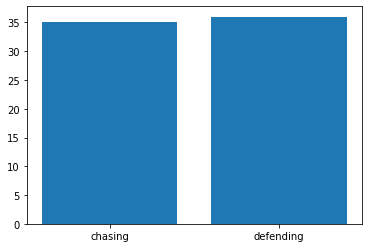

In [132]:
x_values=['chasing','defending']
y_values=[chas.count(),defend.count()]
import matplotlib.pyplot as plt
plt.bar(x_values,y_values)
plt.show()

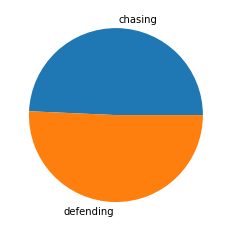

In [133]:
x_values=['chasing','defending']
y_values=[chas.count(),defend.count()]
import matplotlib.pyplot as plt
plt.pie(y_values, labels=x_values)
plt.show()

# Method 2
Using value_counts()

In [134]:
won_by = ipl_data["won_by"].value_counts()
label1 = won_by.index
counts1 = won_by.values

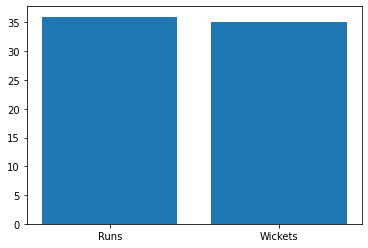

In [135]:
import matplotlib.pyplot as plt
plt.bar(label1,counts1)
plt.show()

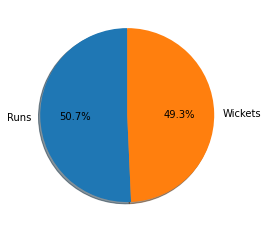

In [136]:
import matplotlib.pyplot as plt
plt.pie(counts1, labels=label1,startangle=90,shadow=True,autopct='%1.1f%%')
plt.show()

So, currently, 24 matches are won while chasing the target, and 22 matches are won while defending the target

**Pie chart example from pycharm**

In [137]:
# slices=[7,2,2,13]
# activities=['sleeping','eating','working','playing']
# cols=['c','m','r','b']
# plt.pie(slices,labels=activities,colors=cols,startangle=90,shadow=True,explode=(0,0.1,0,0),autopct='%1.1f%%')
# plt.title('Pie Chart')
# plt.show()

# Now let’s see what most teams prefer (batting or fielding) after winning the toss:

In [138]:
ipl_data.tail(8)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
63,64,"May 16,2022","Dr DY Patil Sports Academy, Mumbai",Delhi,Punjab,Group,Punjab,Field,159,7,142,9,Delhi,Runs,17,Shardul Thakur,Mitchell Marsh,63,Shardul Takur,4--36
64,65,"May 17,2022","Wankhede Stadium, Mumbai",Hyderabad,Mumbai,Group,Mumbai,Field,193,6,190,7,Hyderabad,Runs,3,Rahul Tripathi,Rahul Tripathi,76,Ramandeep Singh,3--20
65,66,"May 18,2022","Dr DY Patil Sports Academy, Mumbai",Kolkata,Lucknow,Group,Lucknow,Bat,210,0,208,8,Lucknow,Runs,2,Quinton de Kock,Quinton de Kock,140,Mohsin Khan,3--20
66,67,"May 19,2022","Wankhede Stadium, Mumbai",Banglore,Gujarat,Group,Gujarat,Bat,168,5,170,2,Banglore,Wickets,8,Virat Kohli,Virat Kohli,73,Rashid Khan,2--32
67,68,"May 20,2022","Brabourne Stadium, Mumbai",Chennai,Rajasthan,Group,Chennai,Bat,150,6,151,5,Rajasthan,Wickets,5,R Aswin,Moeen Ali,93,Prashant Solanki,2--20
68,69,"May 21,2022","Wankhede Stadium, Mumbai",Delhi,Mumbai,Group,Mumbai,Field,159,7,160,5,Mumbai,Wickets,5,Jasprit Bumrah,Ishan Kishan,48,Jasprit Bumrah,3--25
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Group,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,NaN,Jos Buttler,89,Hardik Pandya,1--14


In [139]:
tosswin=ipl_data['toss_decision'].value_counts()
tosswin

Field    57
Bat      14
Name: toss_decision, dtype: int64

In [140]:
label2=tosswin.index
counts2=tosswin.values

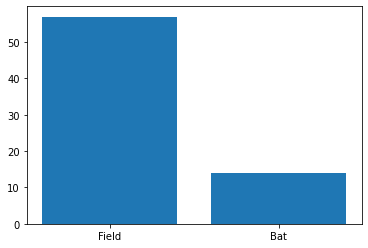

In [141]:
import matplotlib.pyplot as plt
plt.bar(label2,counts2)
plt.show()

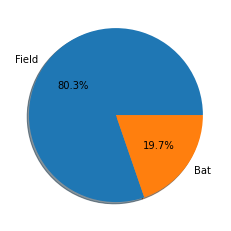

In [142]:
import matplotlib.pyplot as plt
plt.pie(counts2,labels=label2,shadow=True,autopct='%1.1f%%')
plt.show()

Thus, most captains choose to field after winning the toss. So far, in 57 games, captains have chosen to field first, and in just three games, the 14 captains have chosen to bat first.

# Now let’s see the top scorers of most IPL 2022 matches:

In [153]:
topscore=ipl_data['top_scorer'].value_counts()
topscore

Jos Buttler            6
Quinton de Kock        5
Liam Livingstone       4
KL Rahul               4
W. Saha                3
David Warner           3
Faf du Plessis         3
Shubman Gill           3
Ishan Kishan           3
Virat Kohli            2
Rahul Tripathi         2
Hardik Pandya          2
Shikhar Dhawan         2
MS Dhoni               2
Abhishek Sharma        2
Andre Russell          2
Mitchell Marsh         2
Deepak Hooda           2
Devon Conway           2
Sai Sudharsan          1
Sanju Samson           1
Ruturaj Gaikwad        1
Riyan Parag            1
Yashasvi Jaiswal       1
Nitish Rana            1
Shivam Dube            1
Tilak Varma            1
David Miller           1
Dinesh Karthik         1
Kane Williamson        1
Shimron Hetmyer        1
Suryakumar Yadav       1
Pat Cummins            1
Sherfane Rutherford    1
Aiden Markram          1
Moeen Ali              1
Name: top_scorer, dtype: int64

In [154]:
label3=topscore.index
counts3=topscore.values

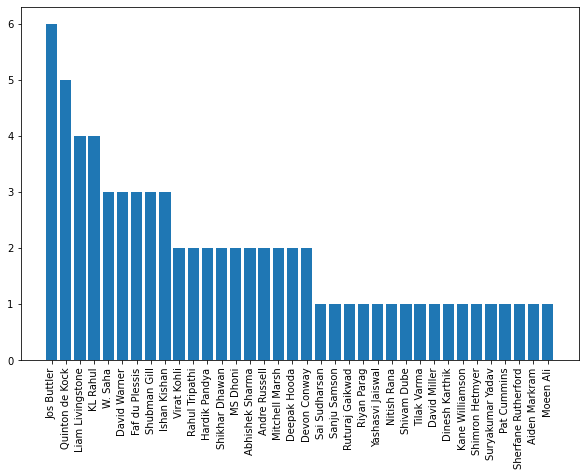

In [169]:
import matplotlib.pyplot as plt
plt.bar(label3,counts3)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10,6.5)
plt.show()

Currently, Jos Buttler has been a top scorer in 6 matches. He is looking in great touch.

# Let’s analyze it deeply by including the runs scored by the top scorers:

In [ ]:
highscore=ipl_data.groupby('top_scorer').sum()['highscore']
highscore

In [147]:
label4=highscore.index
counts4=highscore.values

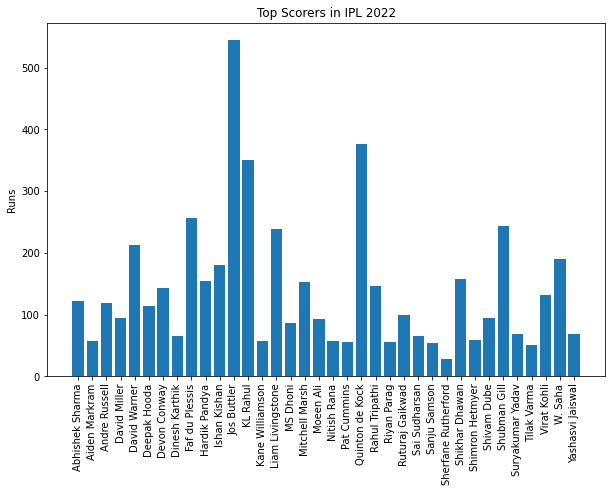

In [168]:
import matplotlib.pyplot as plt
plt.bar(label4,counts4)
plt.xticks(rotation=90)
plt.title("Top Scorers in IPL 2022")
plt.ylabel('Runs')
plt.rcParams["figure.figsize"] = (10,6.5)
plt.show()

# Now let’s have a look at the most player of the match awards till now in IPL 2022:

In [ ]:
playerofmatch=ipl_data['player_of_the_match'].value_counts()
playerofmatch

In [157]:
label5=playerofmatch.index
counts5=playerofmatch.values

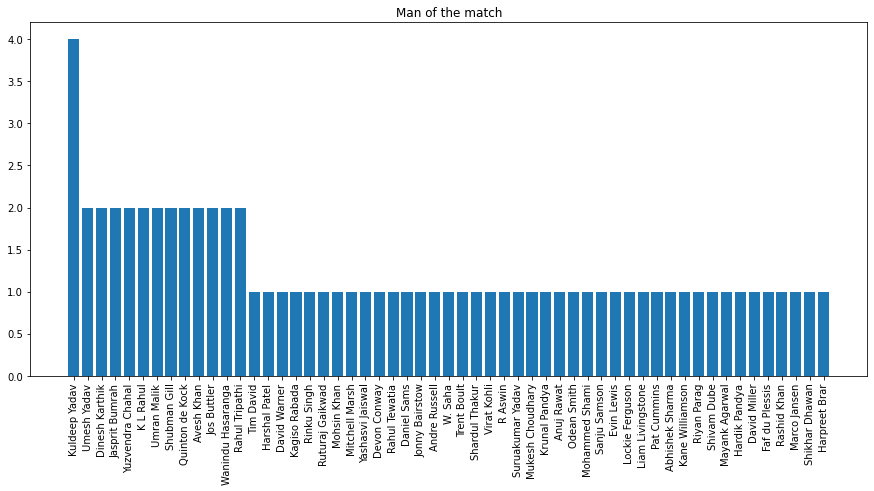

In [173]:
import matplotlib.pyplot as plt
plt.bar(label5,counts5)
plt.xticks(rotation=90)
plt.title('Man of the match')
plt.rcParams["figure.figsize"] = (20,6.5)
plt.show()

So Kuldeep Yadav is leading in the list of players of the match awards with four matches. It is a great tournament for Kuldeep Yadav this year.

# Now let’s have a look at the bowlers with the best bowling figures in most of the matches:

In [ ]:
bowling=ipl_data['best_bowling'].value_counts()
bowling

In [176]:
label6=bowling.index
counts6=bowling.values

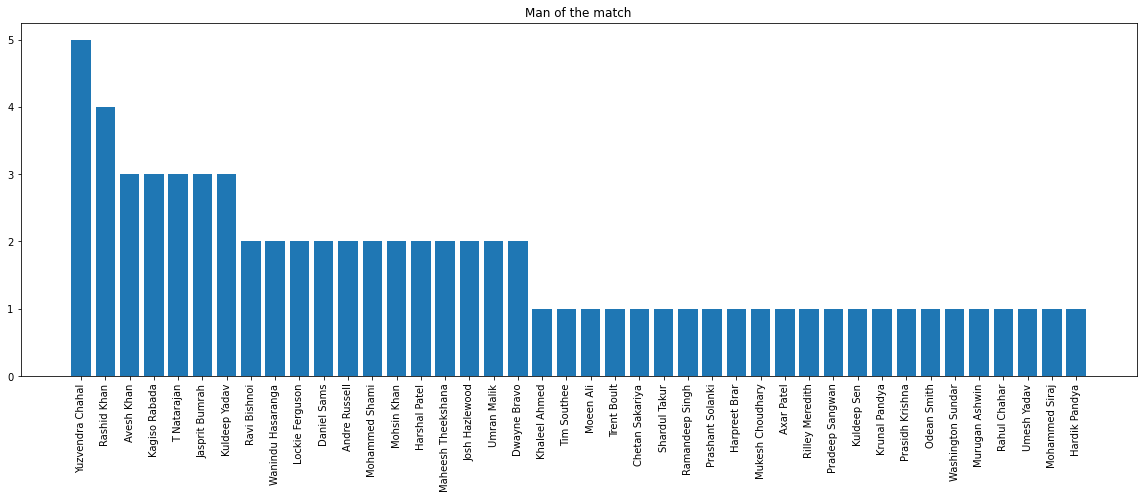

In [177]:
import matplotlib.pyplot as plt
plt.bar(label6,counts6)
plt.xticks(rotation=90)
plt.title('Man of the match')
plt.rcParams["figure.figsize"] = (20,6.5)
plt.show()

You can see Yuzvendra Chahal having the best bowling figures in four matches. So this is a great tournament for Yuzvendra Chahal this year too.

# Now let’s have a look at whether most of the wickets fall while setting the target or while chasing the target:

In [182]:
venueFirINNwickets=ipl_data.groupby('venue').sum()['first_ings_wkts']
venueSecINNwickets=ipl_data.groupby('venue').sum()['second_ings_wkts']

In [183]:
venueFirINNwickets

venue
Brabourne Stadium, Mumbai                       107
Dr DY Patil Sports Academy, Mumbai              126
Eden Gardens, Kolkata                             6
Maharashtra Cricket Association Stadium,Pune     75
Wankhede Stadium, Mumbai                        119
Name: first_ings_wkts, dtype: int64

In [184]:
venueSecINNwickets

venue
Brabourne Stadium, Mumbai                        97
Dr DY Patil Sports Academy, Mumbai              127
Eden Gardens, Kolkata                             3
Maharashtra Cricket Association Stadium,Pune    100
Wankhede Stadium, Mumbai                        118
Name: second_ings_wkts, dtype: int64

In [187]:
label7=venueFirINNwickets.index
# label77=venueSecINNwickets.index
counts7=venueFirINNwickets.values
counts77=venueSecINNwickets.values

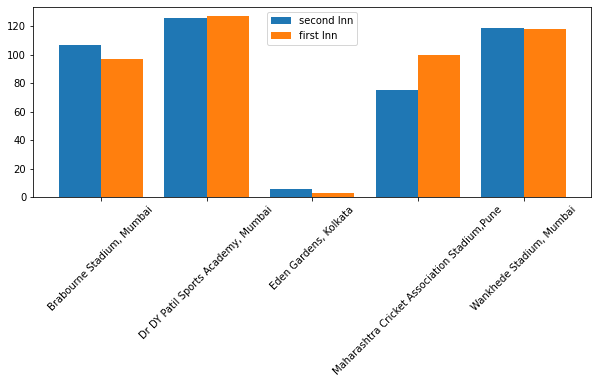

In [195]:
import matplotlib.pyplot as plt
X_axis = np.arange(len(label7))
plt.bar(X_axis-0.2,counts7,.4)
plt.bar(X_axis+0.2,counts77,.4)
plt.xticks(X_axis, label7)
plt.xticks(rotation=45)
plt.rcParams["figure.figsize"] = (10,3.5)
plt.legend(['second Inn','first Inn'])
plt.show()